# Heart disease

# standard librabry import 

In [1]:
# for data visualization 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# for data manupulation
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# for modelling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# for evalution 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import classification_report



# Importing data 
 Heart disease data 

In [2]:
 df = pd.read_csv("6.1 heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### so there is no missing value in data `heart disease`

# let's furthere move to visualize the data by using:
 `matlpotlib
 seaborn` 

In [8]:
correlation = df.corr()

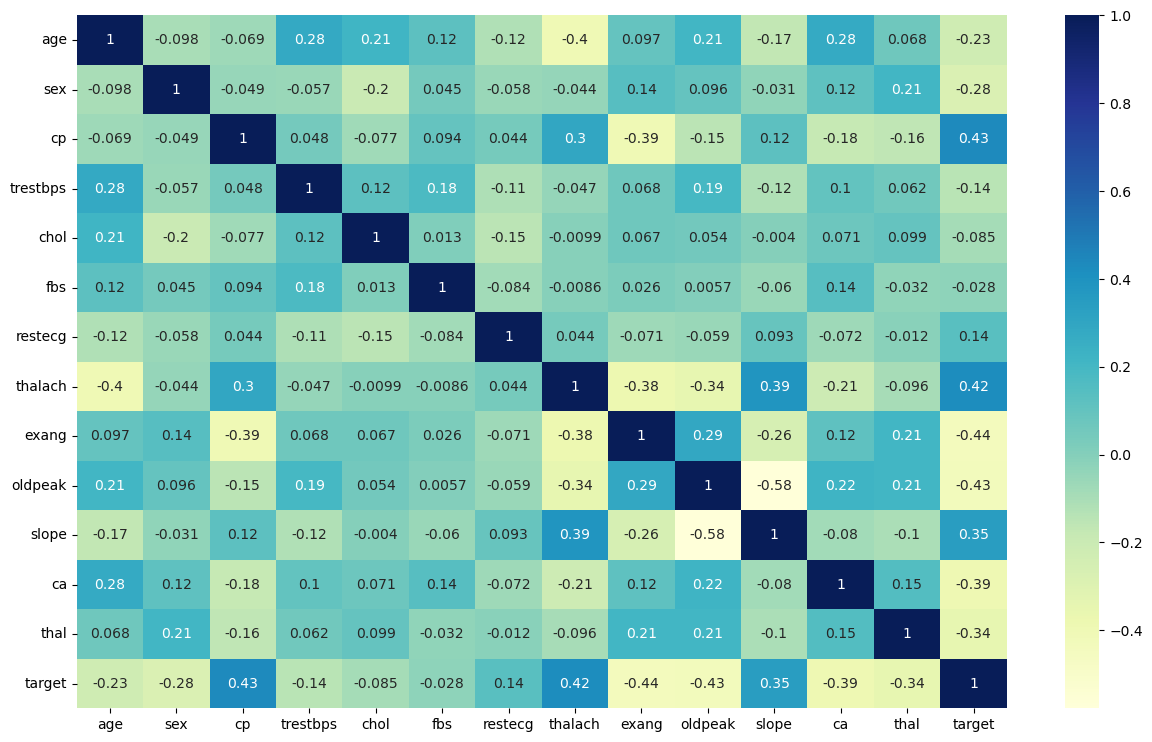

In [9]:
fig , ax = plt.subplots(figsize=(15,9))
ax = sns.heatmap(correlation, annot=True , fmt='.2g', cmap = "YlGnBu")


In [10]:
df.shape

(303, 14)

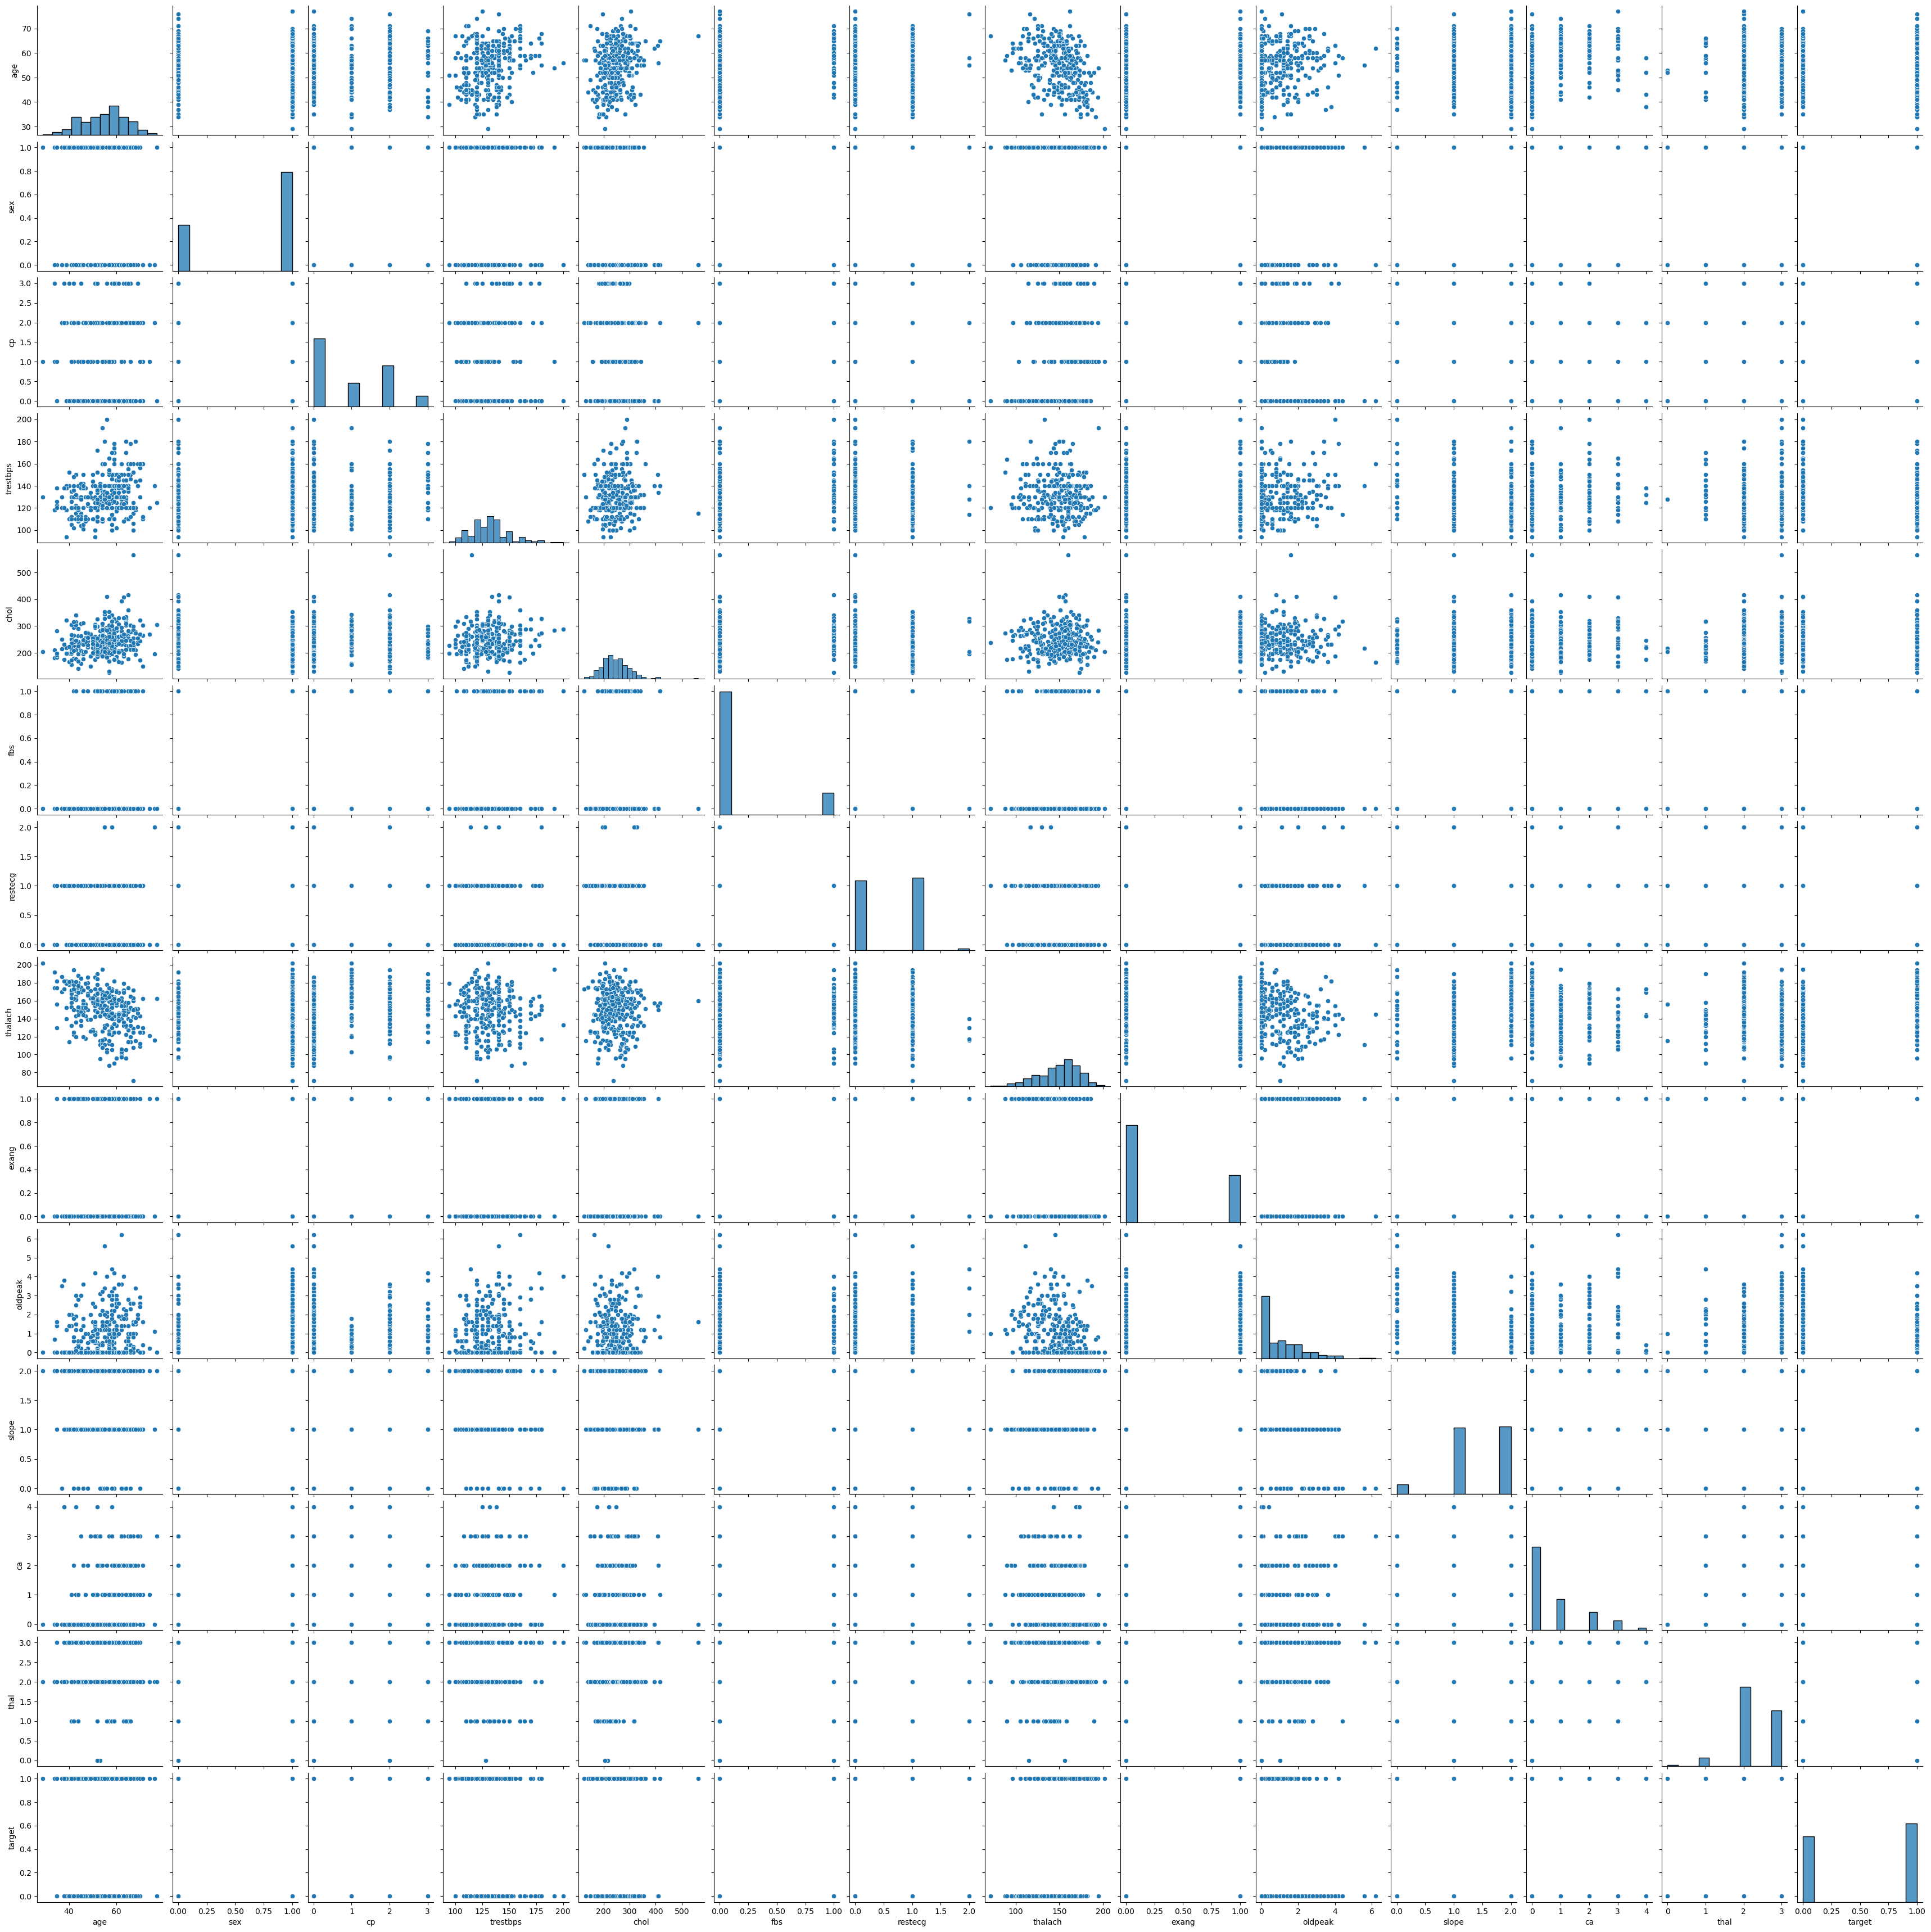

In [11]:
sns.pairplot(df)

<Axes: xlabel='target', ylabel='count'>

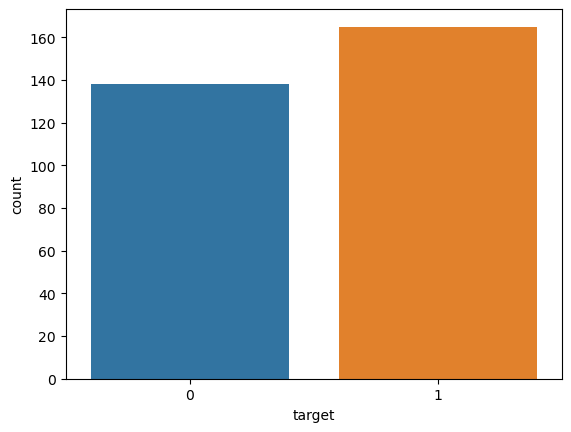

In [12]:
sns.countplot(x="target",data=df)

In [13]:
# spliting features and target 
x = df.drop('target',axis=1)
y = df.target

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [15]:
# put model in dictionary
model = {"logisticRegressor":LogisticRegression(),
         "RandomFroest":RandomForestClassifier()}
# creat a function to fit and score models
def fit_and_score(model, x_train , x_test , y_train , y_test ):
    """
    fits and evaluate given machine learning model 
    model : a dict of diffrent Scikit-Learn machine learning model 
    x_train : training data set (no label)
    x_test : testing data set (no label)
    y_train : training label 
    y_test : testing lable 
    
    """
    # set a random seed
    np.random.seed(42)
    # creating a empty model score dictionary
    model_scores = {}
    # loop through models 
    for name,model in model.items():
        #fit the models 
        model.fit(x_train , y_train)
        #Evaluate the model and append the result into empty dictionary 
        model_scores[name] = model.score(x_test , y_test)
    return model_scores

In [16]:
models_scores = fit_and_score(model=model,
                              x_train=x_train,
                              x_test=x_test,
                              y_train=y_train,
                              y_test= y_test)
models_scores

C:\Users\amirb\OneDrive\Desktop\machine_learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logisticRegressor': 0.8852459016393442, 'RandomFroest': 0.8360655737704918}

<Axes: >

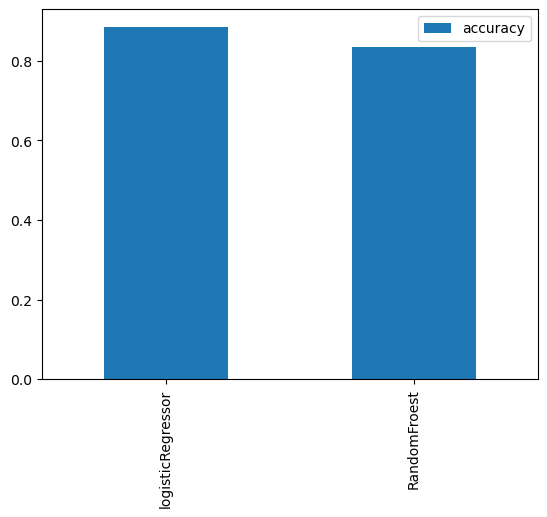

In [17]:
model_compare = pd.DataFrame(models_scores,index=['accuracy'])
model_compare.T.plot.bar()

now we have got a baseline model.... and we know a models's prediction is not always what 
we want we should based on next steps off.
what should we do?


let's look at the following 
* Hyperparameter Tunning 
* feature importance
* confusion matrix
* cross-validation 
* precision
* Recall
* F1 score
* Classification report 
* ROC curve
* Area under the Curve (AUC)




## Hyperparameter tunning of LogisticRegression 

In [18]:
lg_grid = {"C": np.logspace(-4, 4, 20),
           "solver":["liblinear"]}
rc_grid ={"n_estimators":np.arange(10, 1000, 50 ),
          "max_depth":["None", 3, 5 ,7],
          "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}

### Tuning using RandomizedSearchCV


In [19]:
np.random.seed(42)

rs_lg_model = RandomizedSearchCV(LogisticRegression(),param_distributions=lg_grid,n_iter=20,
                                 n_jobs=-1,verbose=True,cv=5,)
# fit the hyperparameter 
rs_lg_model.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_lg_model.score(x_test,y_test)

0.8852459016393442

In [21]:
rs_lg_model.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [22]:
#setup random seed 
np.random.seed(42)

#setup hyperparameter for tunnig RandomFroestClassifier
rs_rc_model = RandomizedSearchCV(RandomForestClassifier(),param_distributions= rc_grid,cv=5,
                                 n_iter=20,n_jobs=-1,verbose=True)
#fit the hyper parameter 
rs_rc_model.fit(x_train, y_train) 


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\amirb\OneDrive\Desktop\machine_learning\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amirb\OneDrive\Desktop\machine_learning\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amirb\OneDrive\Desktop\machine_learning\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\amirb\OneDrive\Desktop\machine_learning\env\Lib\site-packages\sklearn\base.py", line

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': ['None', 3, 5, 7],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [23]:
rs_rc_model.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [24]:
rs_rc_model.score(x_test, y_test)

0.8688524590163934

### Comparing both model after hypertuning by RandomizedSearchCV

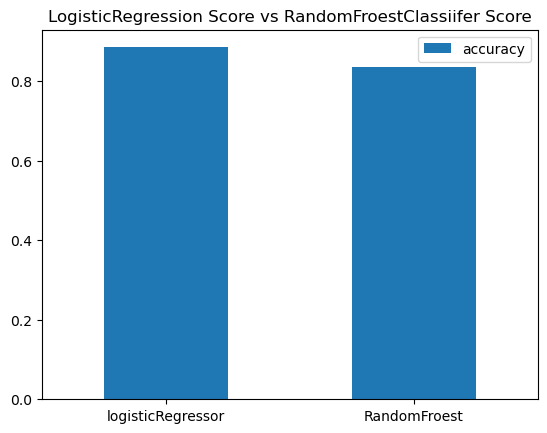

In [25]:
model_score2 = {"logisticregression":rs_lg_model.score(x_test,y_test),
                "RandomForestClassifier":rs_rc_model.score(x_test, y_test)}
model_compare2 = pd.DataFrame(model_score2, index=["accuarcy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0)
plt.title("LogisticRegression Score vs RandomFroestClassiifer Score");

In [26]:
# Set up diffrent hyperparameter for hypertunning LogisticRegression 
gs_lg_grid = {"C": np.logspace(-4, 4 ,50),
               "solver":["liblinear"]}
# Set up Grid hyper paramter for logisticRegression

gs_lg_model = GridSearchCV(LogisticRegression(),param_grid= gs_lg_grid,
                          n_jobs=-1,verbose=True,cv=5)
# fit the model for hypertuned parameters 
gs_lg_model.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [27]:
gs_lg_model.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [28]:
gs_lg_model.score(x_test, y_test)

0.8852459016393442

In [29]:
y_pred = gs_lg_model.predict(x_test)

In [30]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [31]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

# Evaluating our tuned machine learning classifier , beyond accuracy 
* ROC curve
* AUC (Area under the Curve)
* Confusion mtrix
* Precison score
* Recall Score
* F1 score
.....and maybe Cross-validation 


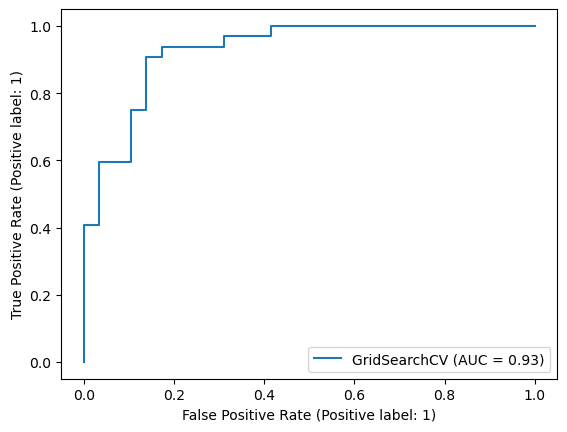

In [32]:
#importing roc plot form sklearn

from sklearn.metrics import RocCurveDisplay

# plotting ROC curve and AUC metric score 
RocCurveDisplay.from_estimator(gs_lg_model ,x_test, y_test);

In [33]:
# confusion matrix
conff_matrix = confusion_matrix(y_test, y_pred)
conff_matrix

array([[25,  4],
       [ 3, 29]], dtype=int64)

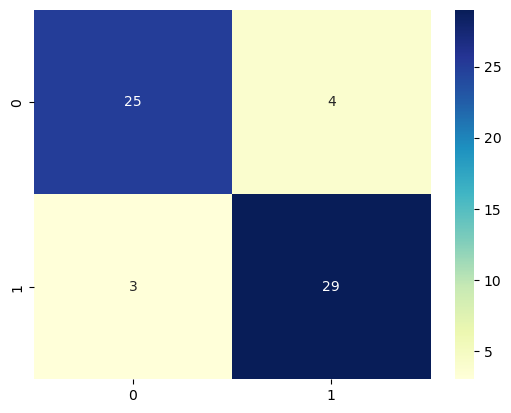

In [34]:
sns.heatmap(conff_matrix, annot=True,cmap= "YlGnBu");

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Feature importance

In [39]:
gs_lg_model.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [41]:
clf = LogisticRegression(C=0.18420699693267145,solver="liblinear")
clf.fit(x_train, y_train)
clf.coef_

array([[ 0.00272731, -0.82426697,  0.64922701, -0.01156101, -0.00162997,
         0.04042661,  0.29835941,  0.02447544, -0.58181218, -0.56278478,
         0.4346521 , -0.62491287, -0.66115885]])

In [43]:
# Match coef's to columns 
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.002727314432465297,
 'sex': -0.8242669667450565,
 'cp': 0.6492270059465478,
 'trestbps': -0.011561008431277442,
 'chol': -0.0016299682970342174,
 'fbs': 0.040426611262114026,
 'restecg': 0.2983594075425178,
 'thalach': 0.02447544435835403,
 'exang': -0.5818121805887974,
 'oldpeak': -0.5627847763197283,
 'slope': 0.43465210004800964,
 'ca': -0.6249128716815715,
 'thal': -0.6611588536991418}

In [46]:
# visualizing feature importance 
feature_df = pd.DataFrame(feature_dict , index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.002727,-0.824267,0.649227,-0.011561,-0.00163,0.040427,0.298359,0.024475,-0.581812,-0.562785,0.434652,-0.624913,-0.661159


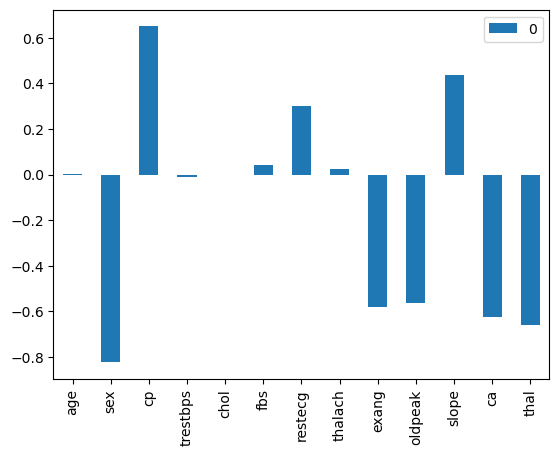

In [49]:
feature_df.T.plot.bar();

# After hypertunning two classifier model the best model we find is LogisticRegression with
* Accuracy `0.8852459016393442`

